# ML Project

In [1]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# Importing the dataset
dataset = pd.read_csv('train.csv')
dataset_test=pd.read_csv('test.csv')


# Missing data analysis and visualization

In [3]:
# find the missing data
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
datatype=dataset.dtypes
missing_data = pd.concat([total, percent,datatype], axis=1, keys=['Total', 'Percent','DataType'])
missing_data_srt=missing_data.sort_values('Total',ascending=False).head(21)
missing_data_srt


,Total,Percent,DataType
PoolQC,1453,0.995205,object
MiscFeature,1406,0.963014,object
Alley,1369,0.937671,object
Fence,1179,0.807534,object
FireplaceQu,690,0.472603,object
LotFrontage,259,0.177397,float64
GarageFinish,81,0.055479,object
GarageQual,81,0.055479,object
GarageType,81,0.055479,object
GarageYrBlt,81,0.055479,float64


Text(0.5,1,'number of missing data by predictors')

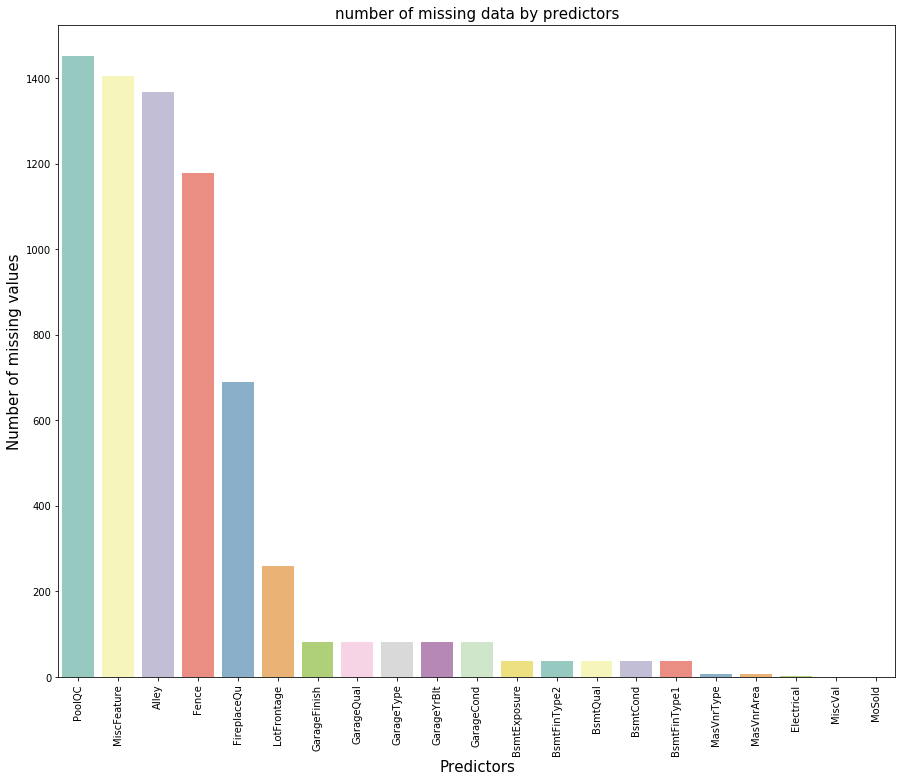

In [4]:
# missing data by features visualization 
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing_data_srt.index, y='Total',data=missing_data_srt,color='b',palette='Set3')
plt.xlabel('Predictors', fontsize=15)
plt.ylabel('Number of missing values', fontsize=15)
plt.title('number of missing data by predictors', fontsize=15)

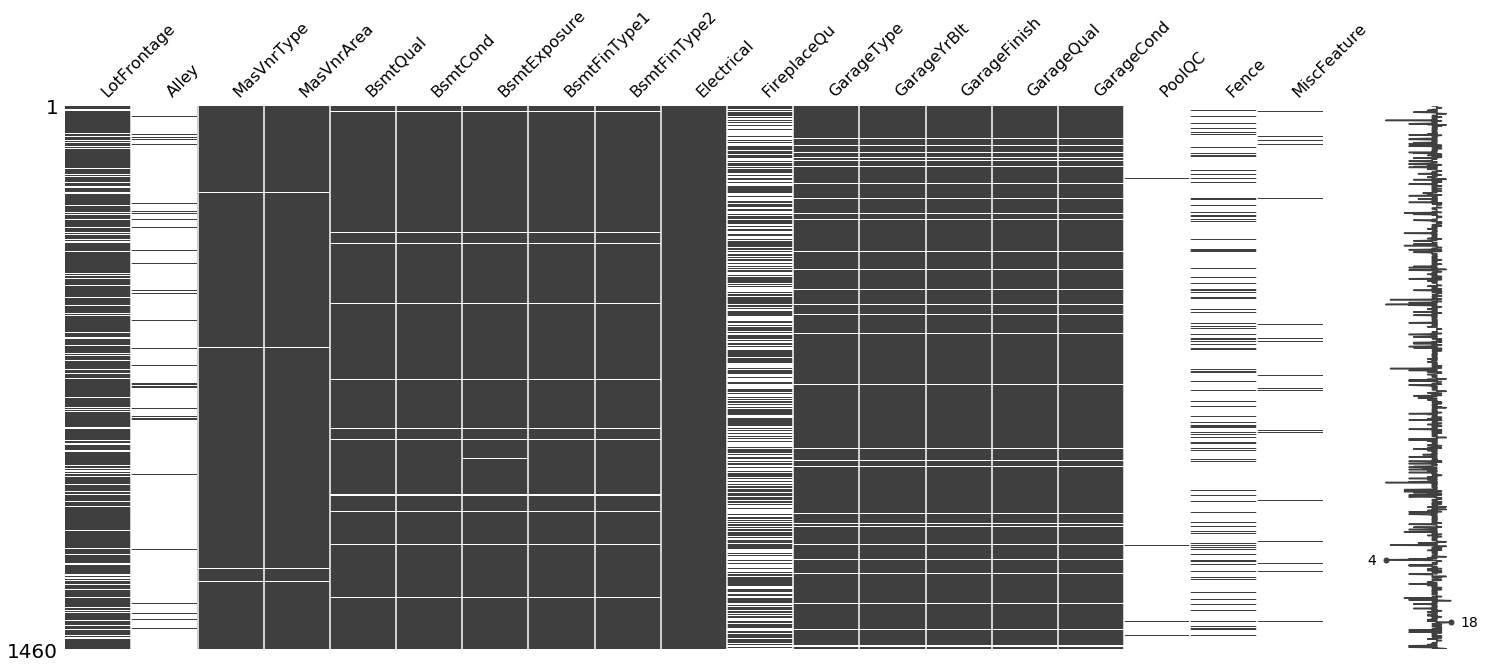

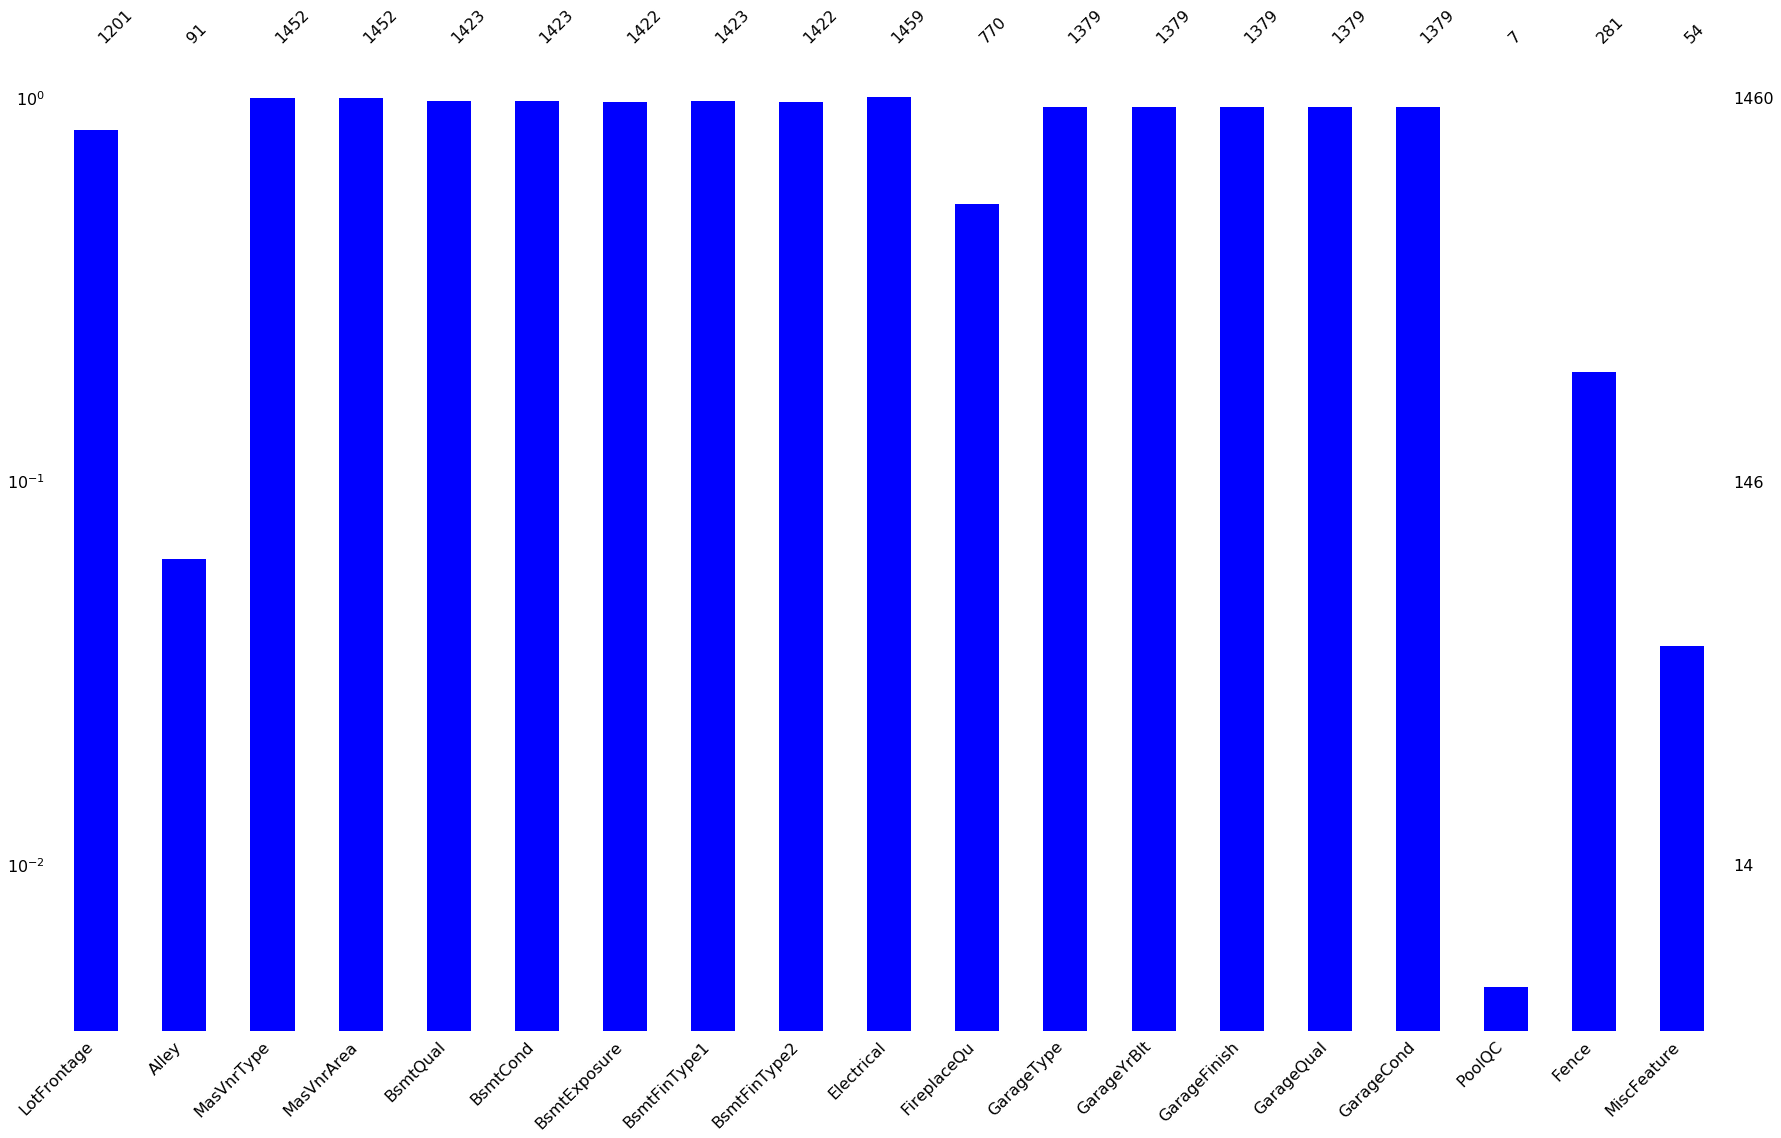

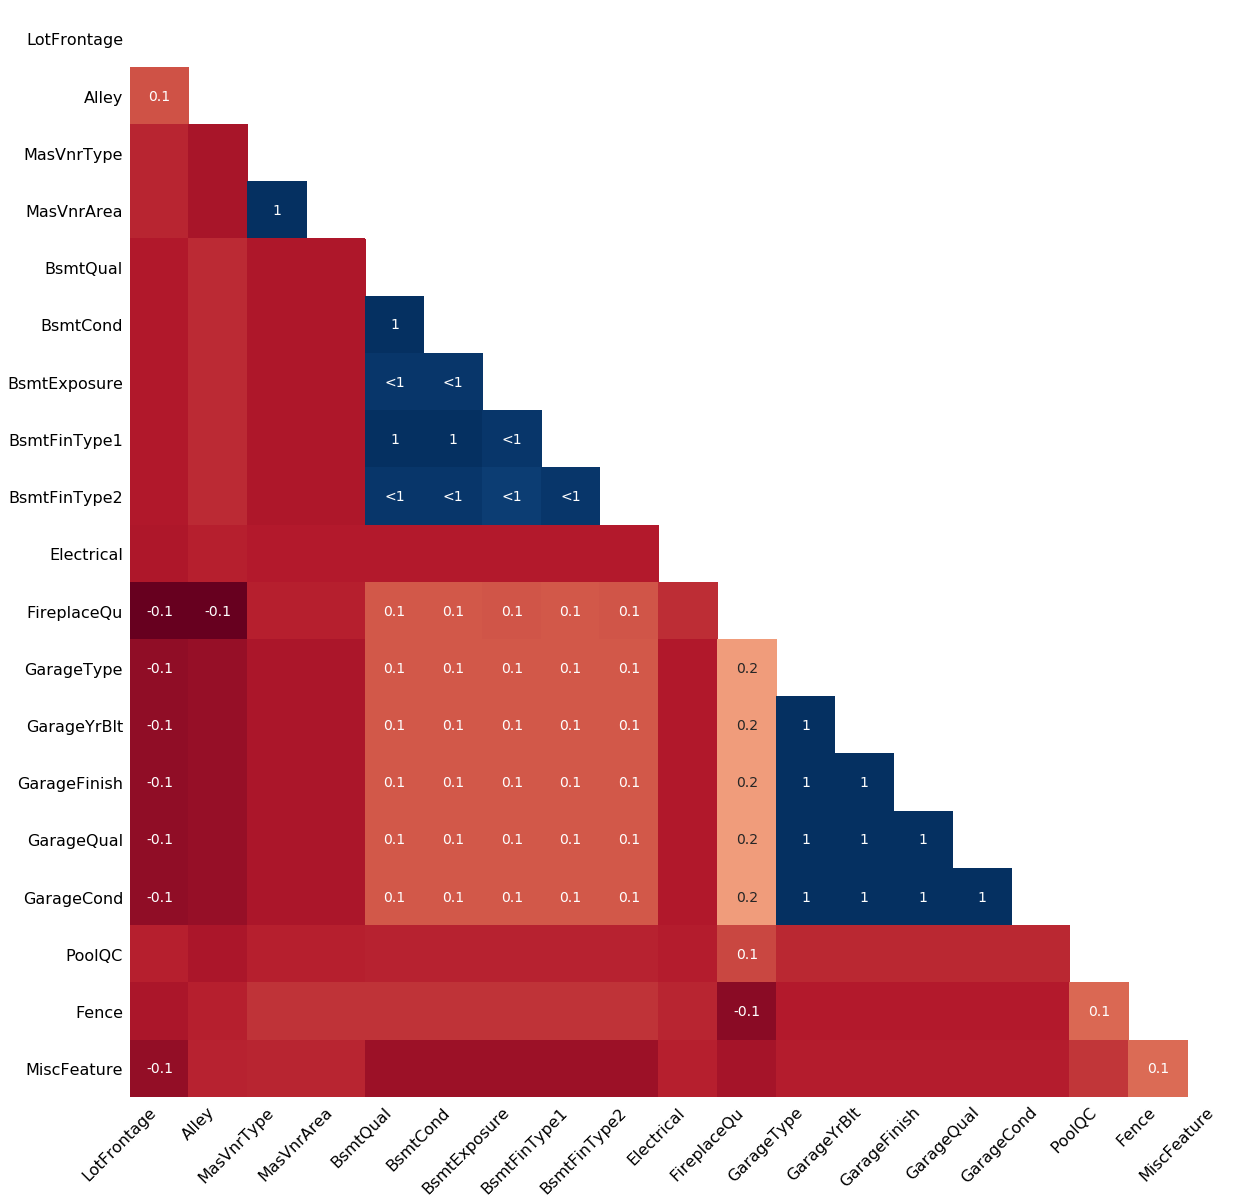

In [8]:
# missing data analysis packages
import missingno as msno
%matplotlib inline

#train_df = pd.read_csv('train_2016_v2.csv', parse_dates=["transactiondate"])
#properties_df = pd.read_csv('properties_2016.csv')
#merged_df = pd.merge(train_df,properties_df)
missing_dataset = dataset.columns[dataset.isnull().any()].tolist()
msno.matrix(dataset[missing_dataset])
msno.bar(dataset[missing_dataset], color="blue", log=True, figsize=(30,18))
msno.heatmap(dataset[missing_dataset], figsize=(20,20))

# Correlation matrix and scatter plot

In [13]:
# separate train and test data in to numerical data and categorica data
num_data=dataset.select_dtypes(exclude=['object'])
cat_data=dataset.select_dtypes(exclude=['number'])
num_data_test=dataset_test.select_dtypes(exclude=['object'])
cat_data_test=dataset_test.select_dtypes(exclude=['number'])
num_data.head()
#cat_data.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


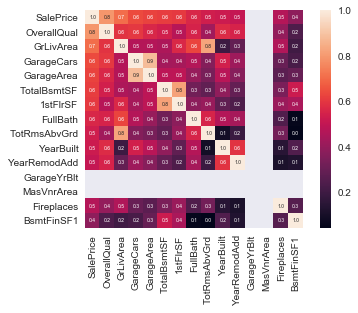

In [14]:
#correlation matrix
#largest columns of the correlation matrix
#most important corelated columns
corrmat = num_data.corr()
k = 15 #number of variables for heatmap
# largest columns of the sales price correlation matrix
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(num_data[cols].values.T) # correlation matric of the data table after taking transpose of the data table
#sns.set(font_scale=1.25)
hmap = sns.heatmap(cm, cbar=True, annot=True ,square=True, fmt='.1f', annot_kws={'size': 5}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

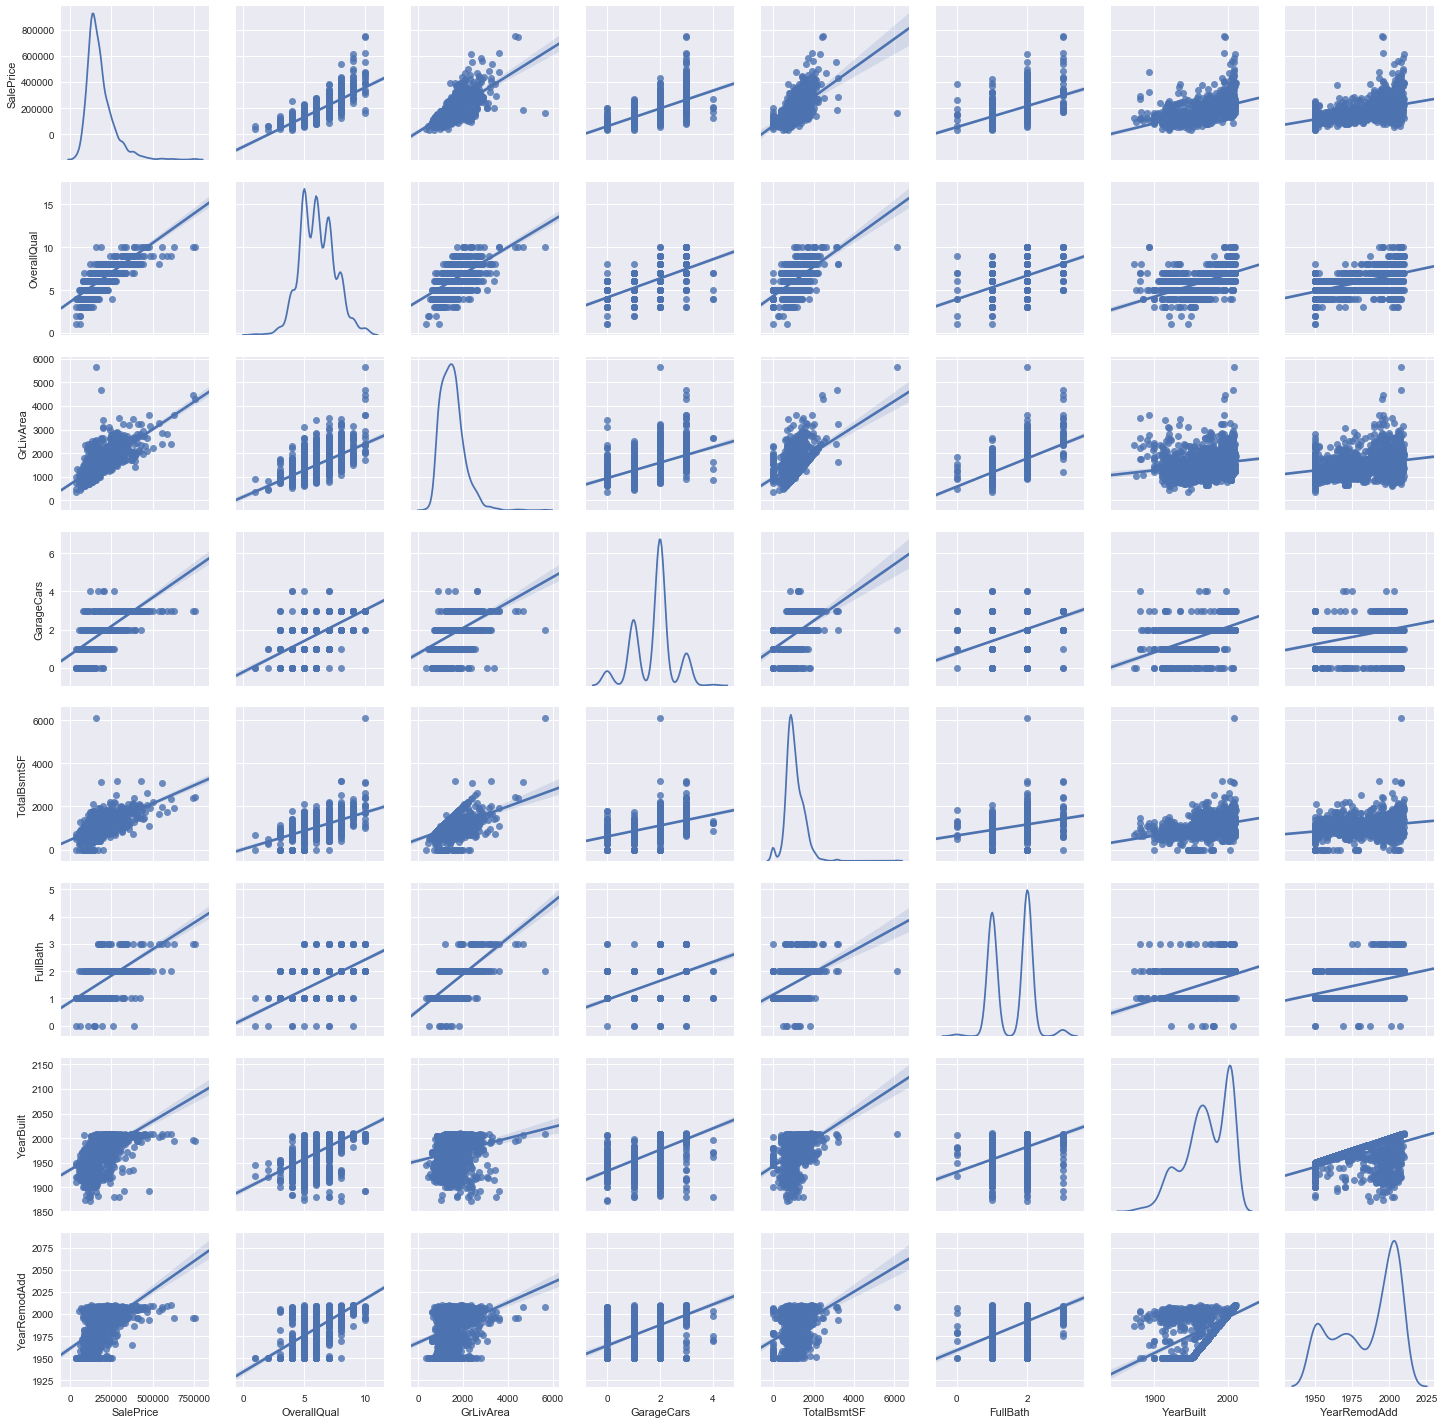

In [12]:
#scatterplots of top efeective varibles
sns.set()
colms = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','YearRemodAdd']
#sns.pairplot(num_data[colms], size = 2.5, hue="OverallQual", palette="husl", kind="reg", diag_kind="kde")
sns.pairplot(num_data[colms], size = 2.5, palette="Set3", kind="reg", diag_kind="kde")
plt.show();

# Following plots indicate me that there is Skewness in Salesprice, GrLiveArea,TotalBsmtSF, YearBuilt.
# we can normalised using log transform on above columns

# Cleaning the data

In [17]:
# check numerical columns missing data
num_data.isnull().sum().sort_values(ascending=False).head(5)

# check categorical columns mising values
cat_data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
Condition1         0
Neighborhood       0
LandSlope          0
dtype: int64

In [16]:
# imputing missing values as a average of the columns

#num_data=num_data.fillna(num_data.mean())
#num_data.head(5)

#or

#following is other suggestion from Kaggle kernal
num_data['LotFrontage']=dataset.groupby(['Neighborhood'])["LotFrontage"].transform(lambda x: x.fillna(x.median()))
num_data["MasVnrArea"] = dataset['MasVnrArea'].fillna(0)
num_data["GarageYrBlt"] = dataset['GarageYrBlt'].fillna(0)
# you might need to GarageYrBlt column
num_data.isnull().sum().sort_values(ascending=False)

SalePrice        0
BsmtFinSF1       0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
MasVnrArea       0
YrSold           0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
MSSubClass       0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
Id               0
dtype: int64

## function for data cleaning 

In [25]:
# This is better way to clean data for train and test both
# function to fill missing values 

def miss_clean(data):
    
    if 'SalePrice' in data.columns:
        data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)
    
    #numerical missing columns
    data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna(x.median()))
    data['MasVnrArea'].fillna(0, inplace=True)
    data['GarageYrBlt'].fillna(data['YearBuilt'], inplace=True)

    #categorical missing columns where missing is a category
    data['PoolQC'].fillna('None', inplace=True)
    data['MiscFeature'].fillna('None', inplace=True)
    data['Alley'].fillna('None', inplace=True)
    data['Fence'].fillna('None', inplace=True)
    data['FireplaceQu'].fillna('None', inplace=True)
    for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
        data[col] = data[col].fillna('None')
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        data[col] = data[col].fillna('None')
    
    #categorical missing columns by mode of the missings columns
    data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
    data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
    data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
    data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
    data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
    data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])
    #data["Functional"] = data["Functional"].fillna("Typ")
    data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        data[col] = data[col].fillna(0)

    #data.drop(['Utilities'], axis=1, inplace=True)
    # data["TotalSF"] = data["TotalBsmtSF"] + data["1stFlrSF"] + data["2ndFlrSF"]
    # data.drop(["TotalBsmtSF","1stFlrSF","2ndFlrSF"], axis=1, inplace=True)
    
    return data


In [26]:
# function to convert numerical type to categorical data
# numerical columns are actually categorical and we need to convert it

def num_category(data):
    
    data['YrSold'] = data['YrSold'].astype('str')
    data['MoSold'] = data['MoSold'].astype('str')
    data['OverallQual'] = data['OverallQual'].astype('str')
    data['MSSubClass'] = data['MSSubClass'].astype('category')
    data['OverallCond'] = data['OverallCond'].astype('str')
    
    return data

In [32]:
# clean data
clean_data1=miss_clean(dataset)
clean_final=num_category(clean_data1)

#clean_final.isnull().sum().sort_values(ascending=False).head(20)
clean_final['Fence']

0        None
1        None
2        None
3        None
4        None
5       MnPrv
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       GdWo
15      GdPrv
16       None
17       None
18       None
19      MnPrv
20       None
21      GdPrv
22       None
23       None
24      MnPrv
25       None
26       None
27       None
28       None
29       None
        ...  
1430     None
1431     None
1432     None
1433     None
1434     None
1435    GdPrv
1436     GdWo
1437     None
1438    MnPrv
1439     None
1440     None
1441     None
1442     None
1443     None
1444     None
1445     None
1446     None
1447     None
1448     GdWo
1449     None
1450     None
1451     None
1452     None
1453     None
1454     None
1455     None
1456    MnPrv
1457    GdPrv
1458     None
1459     None
Name: Fence, Length: 1458, dtype: object

In [30]:
dataset['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

# Model building

In [33]:
# dividing feature and target variables from numerical data only
X = num_data.iloc[:, :-1] # features
y = num_data.iloc[:, -1] # targets
X.head(5)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


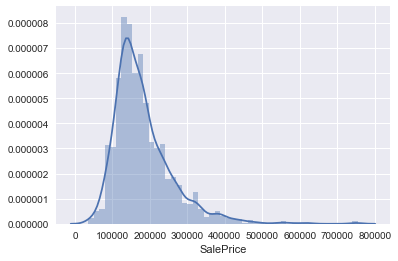

In [36]:
# looking target variables ( sales price)
X1=X
y.describe()
sns.distplot(y)

# building simple regression model

In [65]:
# Splitting the dataset into the Training set and Test set

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2 , random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [48]:
regressor.predict(X_test).

529     200624
491     133000
459     110000
279     192000
655      88000
1013     85000
1403    282922
601     141000
1182    745000
687     148800
1317    208900
1003    136905
1300    225000
1392    123000
1014    119200
254     145000
1322    190000
89      123600
31      149350
482     155000
142     166000
811     144500
52      110000
857     174000
1159    185000
991     168000
1358    177500
649      84500
724     320000
575     118500
         ...  
579     131500
520     106250
825     385000
644     370878
642     345000
29       68500
907     250000
1166    245350
1192    125000
519     234000
361     145000
124     181000
198     104000
787     233000
1211    164000
1075    219500
1237    195000
557     108000
303     149900
1359    315000
1301    177500
1427    140000
1402    193879
1223    137900
1029    118000
326     324000
440     555000
1387    136000
1323     82500
61      101000
Name: SalePrice, Length: 292, dtype: int64

In [63]:

# measure R^2 score
regressor.score(X_train,y_train)
print('R^2', regressor.score(X_test,y_test))
print("RSS: %.2f" % np.sum((y_test - regressor.predict(X_test))**2))
print(sum(abs(y_test - regressor.predict(X_test)))/292)
print(sqrt(np.sum(y_test - regressor.predict(X_test))**2)/292)



R^2 0.6459498966200948
RSS: 713944932955.02
23592.94256267119
1598.708846624872


In [64]:
#### multiple linear regression fit with ols

from math import sqrt
from sklearn import linear_model
ols = linear_model.LinearRegression()

ols.fit(X_train,y_train)

print("R^2: %.5f" % ols.score(X_train, y_train))
print("RSS: %.2f" % np.sum((ols.predict(X_train) - y_train) ** 2))
print(sqrt(np.sum((ols.predict(X_train) - y_train) ** 2))/292)


R^2: 0.84995
RSS: 1079053196130.51
3557.448128204701


In [12]:
# Building the optimal model using Backward Elimination
# insert identity column in train data frame 
import statsmodels.formula.api as sm
X2 = np.append(arr = np.ones((1460, 1)).astype(int), values = X1, axis = 1)
#X_opt = X2[:, [0, 1, 2, 3, 4, 5]]
X_opt = X2[:, list(range(0,X1.shape[1]))]
X_opt

array([[1.000e+00, 1.000e+00, 6.000e+01, ..., 0.000e+00, 0.000e+00,
        2.000e+00],
       [1.000e+00, 2.000e+00, 2.000e+01, ..., 0.000e+00, 0.000e+00,
        5.000e+00],
       [1.000e+00, 3.000e+00, 6.000e+01, ..., 0.000e+00, 0.000e+00,
        9.000e+00],
       ...,
       [1.000e+00, 1.458e+03, 7.000e+01, ..., 0.000e+00, 2.500e+03,
        5.000e+00],
       [1.000e+00, 1.459e+03, 2.000e+01, ..., 0.000e+00, 0.000e+00,
        4.000e+00],
       [1.000e+00, 1.460e+03, 2.000e+01, ..., 0.000e+00, 0.000e+00,
        6.000e+00]])

In [17]:
# regression model

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     184.2
Date:                Sun, 27 May 2018   Prob (F-statistic):           1.35e-39
Time:                        13:18:26   Log-Likelihood:                -18457.
No. Observations:                1460   AIC:                         3.692e+04
Df Residuals:                    1458   BIC:                         3.693e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.63e+04   6535.954     14.734      0.000    8.35e+04    1.09e+05
x1          1208.0155     89.011     13.571      0.000    1033.412    1382.619
==============================================================================
Omnibus:                      527.885   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2673.384
Skew:                           1.623   Prob(JB):                         0.00
Kurtosis:                       8.780   Cond. No.                         245.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:

regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

X_opt = X2[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())
X_opt = X2[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())
X_opt = X2[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())
X_opt = X2[:, [0, 3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     737.4
Date:                Sun, 27 May 2018   Prob (F-statistic):               0.00
Time:                        13:17:58   Log-Likelihood:                -17735.
No. Observations:                1460   AIC:                         3.548e+04
Df Residuals:                    1455   BIC:                         3.551e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.234e+05   6424.769    -19.204      0.0

In [18]:
# Backward elimination method using loop
# Backward elimination with p-values

import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05

X_opt = X2[:, list(range(0,X1.shape[1]))]

X_Modeled = backwardElimination(X_opt, SL)



In [19]:
#Backward elimination with p-values and adjusted R squared

import statsmodels.formula.api as sm
def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((1460,37)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        adjR_before = regressor_OLS.rsquared_adj
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
SL = 0.0005
X_opt = X2[:, list(range(0,X1.shape[1]))]

X_Modeled = backwardElimination(X_opt, SL)



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     187.9
Date:                Sun, 27 May 2018   Prob (F-statistic):               0.00
Time:                        13:18:38   Log-Likelihood:                -17320.
No. Observations:                1460   AIC:                         3.471e+04
Df Residuals:                    1426   BIC:                         3.489e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.095e+06   1.41e+05     -7.740      0.0

In [20]:
from  statsmodels.genmod import generalized_linear_model
glm = generalized_linear_model.GLM(y, X2)
# family = sm.families.Binomial() for logistic regression

In [21]:
result = glm.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            GLM   Df Residuals:                     1424
Model Family:                Gaussian   Df Model:                           35
Link Function:               identity   Scale:               1208173007.038287
Method:                          IRLS   Log-Likelihood:                -17319.
Date:                Sun, 27 May 2018   Deviance:                   1.7204e+12
Time:                        13:18:42   Pearson chi2:                 1.72e+12
No. Iterations:                     2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.593e+05   1.41e+06      0.325      0.745   -2.31e+06    3.23e+06
x1            -1.0779      2.187     -0.493      0.622      -5.365       3.209
x2          -181.2113     27.693     -6.544      0.000    -235.488    -126.934
x3           -56.5968     51.798     -1.093      0.275    -158.118      44.925
x4             0.4283      0.102      4.190      0.000       0.228       0.629
x5           1.73e+04   1188.963     14.551      0.000     1.5e+04    1.96e+04
x6          4680.3797   1033.197      4.530      0.000    2655.351    6705.409
x7           271.3668     67.570      4.016      0.000     138.931     403.802
x8           134.9512     68.643      1.966      0.049       0.413     269.489
x9            31.2989      5.961      5.251      0.000      19.616      42.982
x10            9.9987      2.531      3.950      0.000       5.037      14.960
x11           -0.9504      4.509     -0.211      0.833      -9.789       7.888
x12            0.1095      2.411      0.045      0.964      -4.616       4.835
x13            9.1578      3.368      2.719      0.007       2.556      15.759
x14           18.2958      6.207      2.948      0.003       6.131      30.461
x15           18.1991      5.730      3.176      0.001       6.968      29.430
x16           -5.7366     14.989     -0.383      0.702     -35.115      23.642
x17           30.7584      5.712      5.385      0.000      19.564      41.953
x18         9371.6472   2612.667      3.587      0.000    4250.914    1.45e+04
x19         2005.4643   4093.144      0.490      0.624   -6016.950       1e+04
x20         3460.5291   2837.557      1.220      0.223   -2100.981    9022.039
x21        -1872.5471   2664.541     -0.703      0.482   -7094.951    3349.857
x22        -1.008e+04   1702.599     -5.921      0.000   -1.34e+04   -6743.924
x23        -1.233e+04   5219.340     -2.363      0.018   -2.26e+04   -2103.330
x24         5082.1241   1237.988      4.105      0.000    2655.713    7508.535
x25         3947.9295   1777.741      2.221      0.026     463.621    7432.238
x26          122.1690     69.630      1.755      0.079     -14.304     258.642
x27         1.126e+04   2876.136      3.916      0.000    5624.953    1.69e+04
x28           -4.2008      9.953     -0.422      0.673     -23.709      15.307
x29           23.8698      8.021      2.976      0.003       8.149      39.590
x30           -2.9105     15.186     -0.192      0.848     -32.674      26.853
x31           11.7879     16.870      0.699      0.485     -21.276      44.852
x32           19.7477     31.439      0.628      0.530     -41.872      81.367
x33           55.9648     17.197      3.254      0.001      22.260      89.670
x34          -28.3357     23.864     -1.187      0.235     -75.109      18.437
x35           -0.7364      1.856     -0.397      0.691      -4.373       2.900
x36          -45.2259    345.035     -0.131      0.896    -721.482     631.030
x3

In [22]:
y_train.values.size
y_pred.size
y_test.size

292

In [23]:
# calculate these metrics by hand!
from sklearn import metrics
y_train.values
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 23965.105980522043
MSE: 2527383334.559422
RMSE: 50273.08757734522


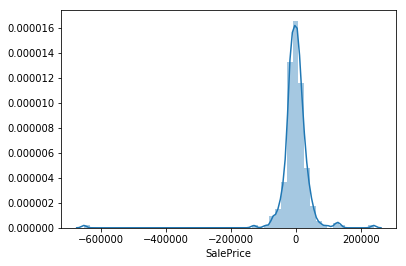

In [24]:
sns.distplot((y_test-y_pred),bins=50);

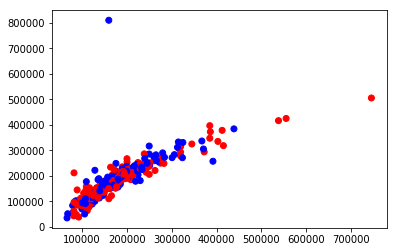

In [25]:
plt.scatter(y_test,y_pred, c=['r','b'])

# SVR regression

In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scale = sc_X.fit_transform(X1)
y_scale = sc_y.fit_transform([y])

X_scale
y_scale
X1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.000000,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.000000,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.000000,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.000000,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.000000,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
5,6,50,85.000000,14115,5,5,1993,1995,0.0,732,...,480,40,30,0,320,0,0,700,10,2009
6,7,20,75.000000,10084,8,5,2004,2005,186.0,1369,...,636,255,57,0,0,0,0,0,8,2007
7,8,60,70.049958,10382,7,6,1973,1973,240.0,859,...,484,235,204,228,0,0,0,350,11,2009
8,9,50,51.000000,6120,7,5,1931,1950,0.0,0,...,468,90,0,205,0,0,0,0,4,2008
9,10,190,50.000000,7420,5,6,1939,1950,0.0,851,...,205,0,4,0,0,0,0,0,1,2008


In [40]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X1, y)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:

# Predicting a new result
y_pred = regressor.predict(6.5)
y_pred = sc_y.inverse_transform(y_pred)


# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'g')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()